In [ ]:
# %%capture
# pip install NeuralForecast

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS
from neuralforecast.models import NBEATS,FEDformer
from neuralforecast.losses.numpy import mae,mse


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# X_df = pd.read_csv('/content/drive/MyDrive/AML/ECL/S/df_x.csv')
# Y_df = pd.read_csv('/content/drive/MyDrive/AML/ECL/S/df_y.csv')

X_df = pd.read_csv('@datasets_reproducibity/ECL/S/df_x.csv')
Y_df = pd.read_csv('@datasets_reproducibity/ECL/S/df_y.csv')

In [4]:
X_df

,ds,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...
26299,2019-07-01 21:00:00,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,-0.500000,-0.333333,-0.466667,-0.00137


In [5]:
Y_df

,ds,unique_id,y
0,2016-07-01 02:00:00,OT,-2.162911
1,2016-07-01 03:00:00,OT,-0.949045
2,2016-07-01 04:00:00,OT,-1.077105
3,2016-07-01 05:00:00,OT,-1.129411
4,2016-07-01 06:00:00,OT,-1.154662
...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872
26300,2019-07-01 22:00:00,OT,-1.093338
26301,2019-07-01 23:00:00,OT,-1.282723
26302,2019-07-02 00:00:00,OT,-1.158270


In [6]:
Y_df['unique_id'].unique()

array(['OT'], dtype=object)

In [7]:
Y_df['ex_1']=X_df['ex_1']
Y_df['ex_2']=X_df['ex_2']
Y_df['ex_3']=X_df['ex_3']
Y_df['ex_4']=X_df['ex_4']

Y_df=Y_df.dropna()

In [8]:

Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-2.162911,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.949045,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.077105,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.129411,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.154662,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.00137


In [9]:
Y_df['ds'] = pd.to_datetime(Y_df['ds'])


## NBeats Horizon 96

In [10]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-2.162911,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.949045,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.077105,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.129411,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.154662,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.00137


In [11]:
Y_train_df = Y_df.iloc[:26208,:]
Y_test_df = Y_df.iloc[26208:,:]

In [12]:
Y_test_df = Y_test_df.reset_index()

In [13]:

Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,26208,2019-06-28 02:00:00,OT,-0.929204,-0.413043,0.166667,0.400000,-0.012329
1,26209,2019-06-28 03:00:00,OT,-0.974296,-0.369565,0.166667,0.400000,-0.012329
2,26210,2019-06-28 04:00:00,OT,-0.884113,-0.326087,0.166667,0.400000,-0.012329
3,26211,2019-06-28 05:00:00,OT,-1.210576,-0.282609,0.166667,0.400000,-0.012329
4,26212,2019-06-28 06:00:00,OT,-1.113178,-0.239130,0.166667,0.400000,-0.012329
...,...,...,...,...,...,...,...,...
91,26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
92,26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
93,26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
94,26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [14]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-28 02:00:00,OT,-0.929204,-0.413043,0.166667,0.400000,-0.012329
1,2019-06-28 03:00:00,OT,-0.974296,-0.369565,0.166667,0.400000,-0.012329
2,2019-06-28 04:00:00,OT,-0.884113,-0.326087,0.166667,0.400000,-0.012329
3,2019-06-28 05:00:00,OT,-1.210576,-0.282609,0.166667,0.400000,-0.012329
4,2019-06-28 06:00:00,OT,-1.113178,-0.239130,0.166667,0.400000,-0.012329
...,...,...,...,...,...,...,...
91,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
92,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
93,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
94,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [15]:
horizon = 96
model = NBEATS(h=horizon, input_size=24,
               max_steps=300,
               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [16]:
nf = NeuralForecast(models=[model],freq='M')

In [17]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
2024-04-21 09:05:39.779907: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-21 09:05:39.997862: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when 

Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=300` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [18]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,NBEATS
unique_id,,
OT,0,-0.711646
OT,1,-0.815805
OT,2,-0.876740
OT,3,-0.996484
OT,4,-1.113872
...,...,...
OT,91,-0.371373
OT,92,-0.461447
OT,93,-0.600477


<Axes: xlabel='ds'>

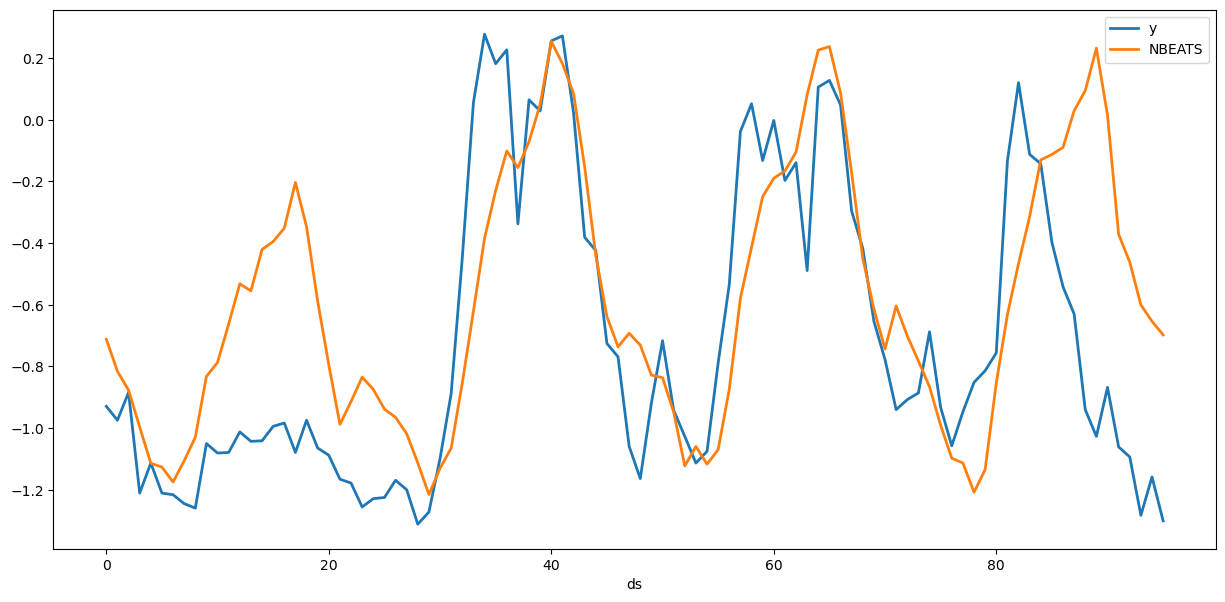

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'NBEATS']].plot(ax=ax, linewidth=2)

In [20]:
forecasts=forecasts.set_index('ds')
forecasts

,NBEATS
ds,
0,-0.711646
1,-0.815805
2,-0.876740
3,-0.996484
4,-1.113872
...,...
91,-0.371373
92,-0.461447
93,-0.600477


In [21]:


mae_nbeats = mae(Y_test_df['y'], forecasts['NBEATS'])
mse_nbeats = mse(Y_test_df['y'], forecasts['NBEATS'])
print(f'N-Beats MAE: {mae_nbeats:.3f}')
print(f'N-Beats MSE: {mse_nbeats:.3f}')

N-Beats MAE: 0.291
N-Beats MSE: 0.150


## NBeats Horizon 192

In [23]:
Y_train_df = Y_df.iloc[:26112,:]
Y_test_df = Y_df.iloc[26112:,:]

In [24]:
Y_test_df = Y_test_df.reset_index()

In [25]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,26112,2019-06-24 02:00:00,OT,-0.857058,-0.413043,-0.500000,0.266667,-0.023288
1,26113,2019-06-24 03:00:00,OT,-0.700139,-0.369565,-0.500000,0.266667,-0.023288
2,26114,2019-06-24 04:00:00,OT,-0.402534,-0.326087,-0.500000,0.266667,-0.023288
3,26115,2019-06-24 05:00:00,OT,-0.658655,-0.282609,-0.500000,0.266667,-0.023288
4,26116,2019-06-24 06:00:00,OT,-0.763267,-0.239130,-0.500000,0.266667,-0.023288
...,...,...,...,...,...,...,...,...
187,26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
188,26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
189,26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
190,26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [26]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-24 02:00:00,OT,-0.857058,-0.413043,-0.500000,0.266667,-0.023288
1,2019-06-24 03:00:00,OT,-0.700139,-0.369565,-0.500000,0.266667,-0.023288
2,2019-06-24 04:00:00,OT,-0.402534,-0.326087,-0.500000,0.266667,-0.023288
3,2019-06-24 05:00:00,OT,-0.658655,-0.282609,-0.500000,0.266667,-0.023288
4,2019-06-24 06:00:00,OT,-0.763267,-0.239130,-0.500000,0.266667,-0.023288
...,...,...,...,...,...,...,...
187,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
188,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
189,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
190,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [27]:
horizon = 192
model = NBEATS(h=horizon, input_size=24,
               max_steps=3000,
               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [28]:
nf = NeuralForecast(models=[model],freq='H')

In [29]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 3.0 M 
-----------------------------------------------
2.9 M     Trainable params
83.2 K    Non-trainable params
3.0 M     Total params
11.965    Total estimated model params size (MB)


Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=3000` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [30]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,NBEATS
unique_id,,
OT,0,-1.055753
OT,1,-0.996533
OT,2,-0.854505
OT,3,-0.878738
OT,4,-0.981054
...,...,...
OT,187,-0.029052
OT,188,-0.177422
OT,189,-0.522272


<Axes: xlabel='ds'>

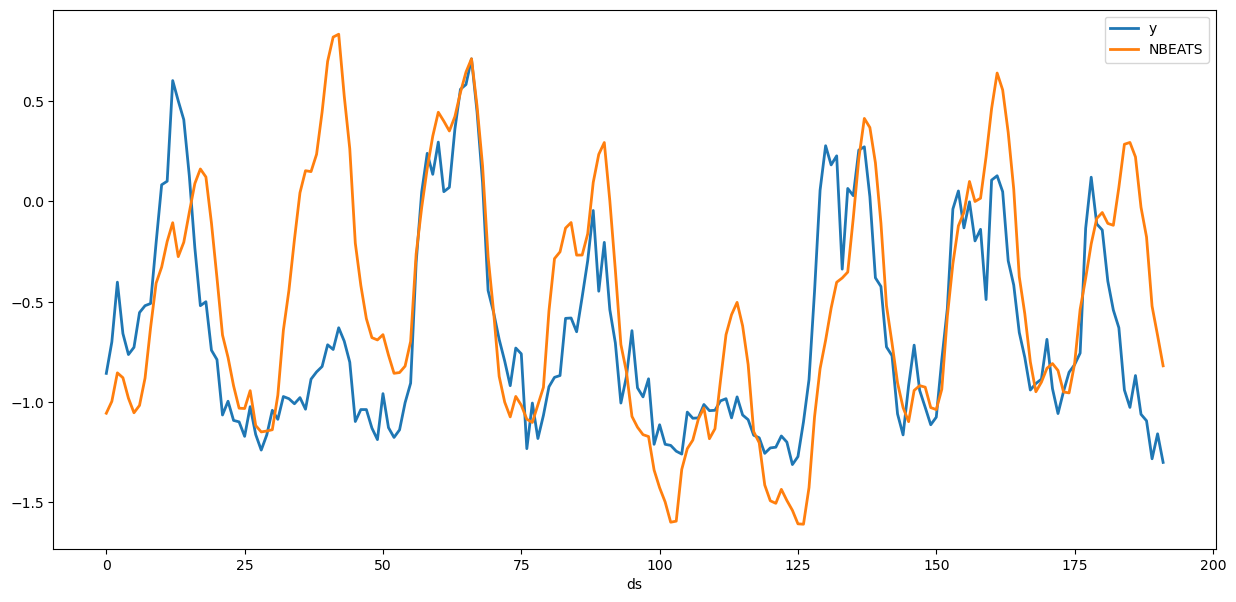

In [31]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'NBEATS']].plot(ax=ax, linewidth=2)

In [32]:
forecasts=forecasts.set_index('ds')
forecasts

,NBEATS
ds,
0,-1.055753
1,-0.996533
2,-0.854505
3,-0.878738
4,-0.981054
...,...
187,-0.029052
188,-0.177422
189,-0.522272


In [33]:
mae_nbeats = mae(Y_test_df['y'], forecasts['NBEATS'])
mse_nbeats = mse(Y_test_df['y'], forecasts['NBEATS'])
print(f'mae_nbeats MAE: {mae_nbeats:.3f}')
print(f'mse_nbeats MSE: {mse_nbeats:.3f}')

mae_nbeats MAE: 0.354
mse_nbeats MSE: 0.230


## NBeatsx Horizon = 336

In [34]:
Y_train_df = Y_df.iloc[:25968,:]
Y_test_df = Y_df.iloc[25968:,:]

In [35]:
Y_test_df = Y_test_df.reset_index()

In [36]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,25968,2019-06-18 02:00:00,OT,-0.844432,-0.413043,-0.333333,0.066667,-0.039726
1,25969,2019-06-18 03:00:00,OT,-0.869683,-0.369565,-0.333333,0.066667,-0.039726
2,25970,2019-06-18 04:00:00,OT,-0.727194,-0.326087,-0.333333,0.066667,-0.039726
3,25971,2019-06-18 05:00:00,OT,-0.830003,-0.282609,-0.333333,0.066667,-0.039726
4,25972,2019-06-18 06:00:00,OT,-1.037424,-0.239130,-0.333333,0.066667,-0.039726
...,...,...,...,...,...,...,...,...
331,26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
332,26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
333,26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
334,26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [37]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-18 02:00:00,OT,-0.844432,-0.413043,-0.333333,0.066667,-0.039726
1,2019-06-18 03:00:00,OT,-0.869683,-0.369565,-0.333333,0.066667,-0.039726
2,2019-06-18 04:00:00,OT,-0.727194,-0.326087,-0.333333,0.066667,-0.039726
3,2019-06-18 05:00:00,OT,-0.830003,-0.282609,-0.333333,0.066667,-0.039726
4,2019-06-18 06:00:00,OT,-1.037424,-0.239130,-0.333333,0.066667,-0.039726
...,...,...,...,...,...,...,...
331,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
332,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
333,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
334,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [38]:
horizon = 336
model = NBEATS(h=horizon, input_size=24,
               max_steps=250,
               mlp_units=[[512,512],[512,512],[512,512],[512,512],[512,512]],

               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [39]:
nf = NeuralForecast(models=[model],freq='H')

In [40]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 5.1 M 
-----------------------------------------------
4.9 M     Trainable params
242 K     Non-trainable params
5.1 M     Total params
20.383    Total estimated model params size (MB)


Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=250` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [41]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,NBEATS
unique_id,,
OT,0,-0.944655
OT,1,-0.931578
OT,2,-0.912779
OT,3,-0.924002
OT,4,-1.083331
...,...,...
OT,331,0.288635
OT,332,-0.073168
OT,333,-0.291646


<Axes: xlabel='ds'>

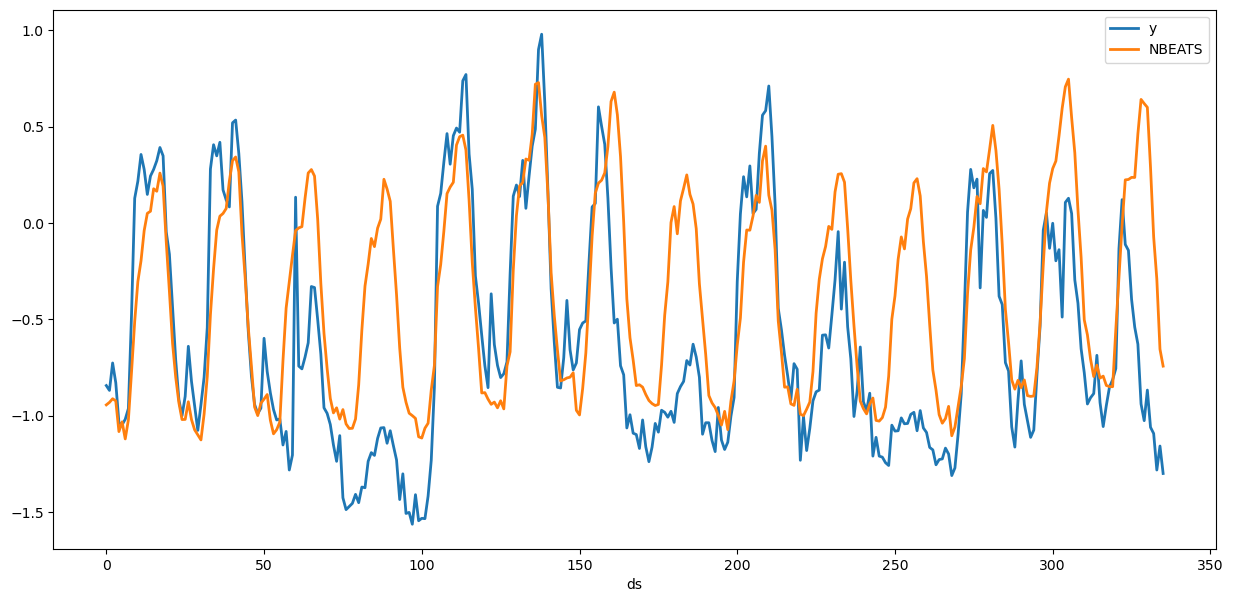

In [42]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'NBEATS']].plot(ax=ax, linewidth=2)

In [43]:
forecasts=forecasts.set_index('ds')
forecasts

,NBEATS
ds,
0,-0.944655
1,-0.931578
2,-0.912779
3,-0.924002
4,-1.083331
...,...
331,0.288635
332,-0.073168
333,-0.291646


In [44]:
from neuralforecast.losses.numpy import mae,mse


mae_nbeats = mae(Y_test_df['y'], forecasts['NBEATS'])
mse_nbeats = mse(Y_test_df['y'], forecasts['NBEATS'])
print(f'Autoformer MAE: {mae_nbeats:.3f}')
print(f'Autoformer MSE: {mse_nbeats:.3f}')

Autoformer MAE: 0.379
Autoformer MSE: 0.254


## NBeatsx Horizon = 720

In [45]:
Y_train_df = Y_df.iloc[:25584,:]
Y_test_df = Y_df.iloc[25584:,:]

In [46]:
Y_test_df = Y_test_df.reset_index()

In [47]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,25584,2019-06-02 02:00:00,OT,-1.142037,-0.413043,0.500000,-0.466667,-0.083562
1,25585,2019-06-02 03:00:00,OT,-0.936419,-0.369565,0.500000,-0.466667,-0.083562
2,25586,2019-06-02 04:00:00,OT,-0.743427,-0.326087,0.500000,-0.466667,-0.083562
3,25587,2019-06-02 05:00:00,OT,-0.970689,-0.282609,0.500000,-0.466667,-0.083562
4,25588,2019-06-02 06:00:00,OT,-1.064479,-0.239130,0.500000,-0.466667,-0.083562
...,...,...,...,...,...,...,...,...
715,26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
716,26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
717,26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
718,26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [48]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-02 02:00:00,OT,-1.142037,-0.413043,0.500000,-0.466667,-0.083562
1,2019-06-02 03:00:00,OT,-0.936419,-0.369565,0.500000,-0.466667,-0.083562
2,2019-06-02 04:00:00,OT,-0.743427,-0.326087,0.500000,-0.466667,-0.083562
3,2019-06-02 05:00:00,OT,-0.970689,-0.282609,0.500000,-0.466667,-0.083562
4,2019-06-02 06:00:00,OT,-1.064479,-0.239130,0.500000,-0.466667,-0.083562
...,...,...,...,...,...,...,...
715,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
716,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
717,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
718,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [49]:
horizon = 720
model = NBEATS(h=horizon, input_size=24,
               max_steps=25,
               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [50]:
nf = NeuralForecast(models=[model],freq='H')

In [51]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/common/_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 5.3 M 
-----------------------------------------------
4.3 M     Trainable params
1.1 M     Non-trainable params
5.3 M     Total params
21.338    Total estimated model params size (MB)


Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=25` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [52]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,NBEATS
unique_id,,
OT,0,-0.838349
OT,1,-1.115462
OT,2,-1.020449
OT,3,-1.355879
OT,4,-1.208531
...,...,...
OT,715,0.327222
OT,716,-0.243741
OT,717,-0.281370


<Axes: xlabel='ds'>

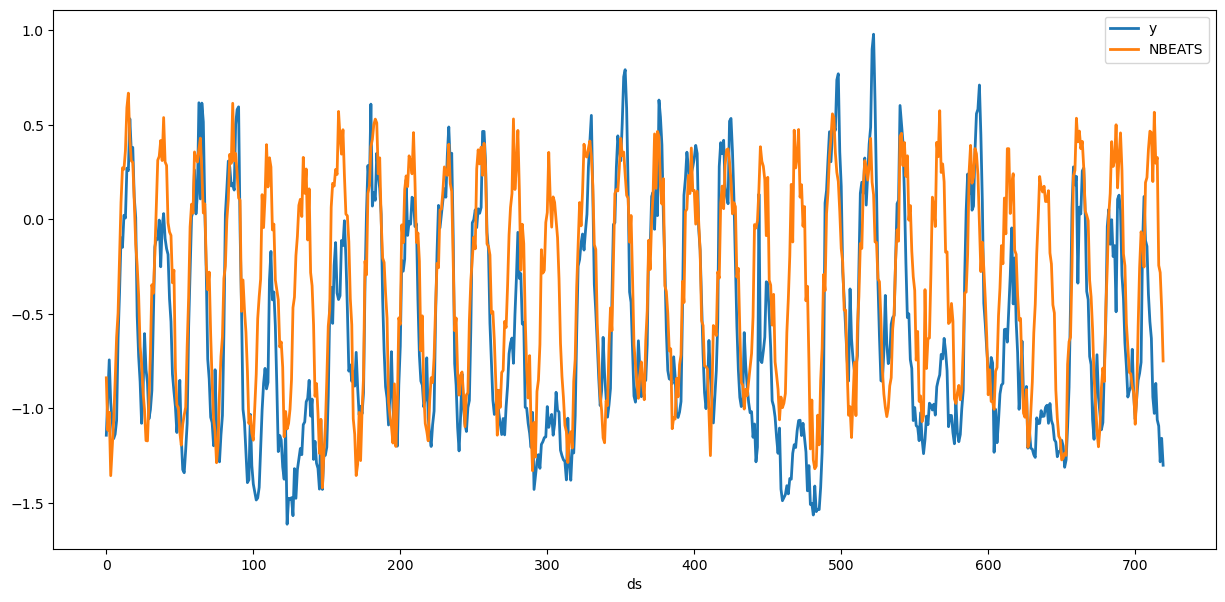

In [53]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'NBEATS']].plot(ax=ax, linewidth=2)

In [54]:
forecasts=forecasts.set_index('ds')
forecasts

,NBEATS
ds,
0,-0.838349
1,-1.115462
2,-1.020449
3,-1.355879
4,-1.208531
...,...
715,0.327222
716,-0.243741
717,-0.281370


In [55]:
from neuralforecast.losses.numpy import mae,mse


mae_nbeats = mae(Y_test_df['y'], forecasts['NBEATS'])
mse_nbeats = mse(Y_test_df['y'], forecasts['NBEATS'])
print(f'N-Beats MAE: {mae_nbeats:.3f}')
print(f'N-Beats MSE: {mse_nbeats:.3f}')

N-Beats MAE: 0.383
N-Beats MSE: 0.259
